**Machine Vision Project**

**Université Paris-Saclay**

**Xinya MA 20240136**

In [ ]:
import os
from PIL import Image

image_dir = "C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train\\Cow"

# Iterate over the image and print the dimensions
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        path = os.path.join(image_dir, filename)
        with Image.open(path) as img:
            print(f"{filename}: {img.size}")  


cow1.png: (256, 256)
cow10.png: (256, 256)
cow11.png: (256, 256)
cow12.png: (256, 256)
cow13.png: (256, 256)
cow14.png: (256, 256)
cow15.png: (256, 256)
cow16.png: (256, 256)
cow17.png: (256, 256)
cow18.png: (256, 256)
cow19.png: (256, 256)
cow2.png: (256, 256)
cow20.png: (256, 256)
cow21.png: (256, 256)
cow22.png: (256, 256)
cow23.png: (256, 256)
cow24.png: (256, 256)
cow25.png: (256, 256)
cow26.png: (256, 256)
cow27.png: (256, 256)
cow28.png: (256, 256)
cow29.png: (256, 256)
cow3.png: (256, 256)
cow30.png: (256, 256)
cow31.png: (256, 256)
cow32.png: (256, 256)
cow33.png: (256, 256)
cow34.png: (256, 256)
cow35.png: (256, 256)
cow36.png: (256, 256)
cow37.png: (256, 256)
cow38.png: (256, 256)
cow39.png: (256, 256)
cow4.png: (256, 256)
cow40.png: (256, 256)
cow41.png: (256, 256)
cow5.png: (256, 256)
cow6.png: (256, 256)
cow7.png: (256, 256)
cow8.png: (256, 256)
cow9.png: (256, 256)


# **Part I: Classifiers(2025.4.1)**

## 1.design a CNN classifier model

In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

Epoch [1/10] - Loss: 0.6911 - Val Accuracy: 51.22%
Epoch [2/10] - Loss: 0.2851 - Val Accuracy: 50.00%
Epoch [3/10] - Loss: 0.0292 - Val Accuracy: 47.56%
Epoch [4/10] - Loss: 0.0083 - Val Accuracy: 48.78%
Epoch [5/10] - Loss: 0.0053 - Val Accuracy: 47.56%
Epoch [6/10] - Loss: 0.0000 - Val Accuracy: 50.00%
Epoch [7/10] - Loss: 0.0000 - Val Accuracy: 50.00%
Epoch [8/10] - Loss: 0.0000 - Val Accuracy: 50.00%
Epoch [9/10] - Loss: 0.0000 - Val Accuracy: 48.78%
Epoch [10/10] - Loss: 0.0000 - Val Accuracy: 52.44%


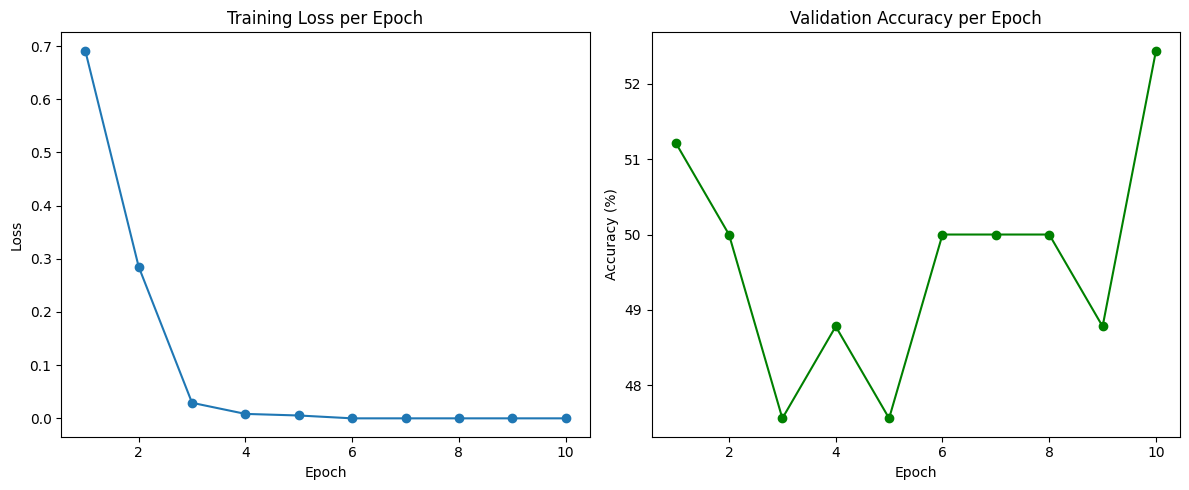

In [31]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load training and validation datasets
# Update these paths to your local dataset locations
train_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train", transform=transform)
val_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Test", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# Image transformations for training and validation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    #transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
])

# Define a simple CNN for binary classification (cow vs horse)
class CowHorseCNN(nn.Module):
    def __init__(self):
        super(CowHorseCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 32 x 64 x 64

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 64 x 32 x 32

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: 128 x 16 x 16
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 2)  # 2 classes: cow and horse
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Instantiate the model and move to device
model = CowHorseCNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss and accuracy for plotting
train_losses = []
val_accuracies = []

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {train_loss:.4f} - Val Accuracy: {val_accuracy:.2f}%")

# Plot training loss and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), val_accuracies, marker='o', color='green')
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

plt.tight_layout()
plt.show()


In [6]:
from torchsummary import summary
import torch

model = CowHorseCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# print the parameter summary
summary(model, input_size=(3, 128, 128))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
              ReLU-2         [-1, 32, 128, 128]               0
         MaxPool2d-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
              ReLU-5           [-1, 64, 64, 64]               0
         MaxPool2d-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
              ReLU-8          [-1, 128, 32, 32]               0
         MaxPool2d-9          [-1, 128, 16, 16]               0
          Flatten-10                [-1, 32768]               0
           Linear-11                  [-1, 128]       4,194,432
             ReLU-12                  [-1, 128]               0
          Dropout-13                  [-1, 128]               0
           Linear-14                   

## 2.design ResNet models(ResNet18)


[1/10] Loss: 0.2508 | Val Acc: 50.00%
[2/10] Loss: 0.0178 | Val Acc: 47.56%
[3/10] Loss: 0.0138 | Val Acc: 46.34%
[4/10] Loss: 0.0027 | Val Acc: 50.00%
[5/10] Loss: 0.0033 | Val Acc: 50.00%
[6/10] Loss: 0.0024 | Val Acc: 47.56%
[7/10] Loss: 0.0040 | Val Acc: 47.56%
[8/10] Loss: 0.0025 | Val Acc: 48.78%
[9/10] Loss: 0.0006 | Val Acc: 50.00%
[10/10] Loss: 0.0008 | Val Acc: 50.00%


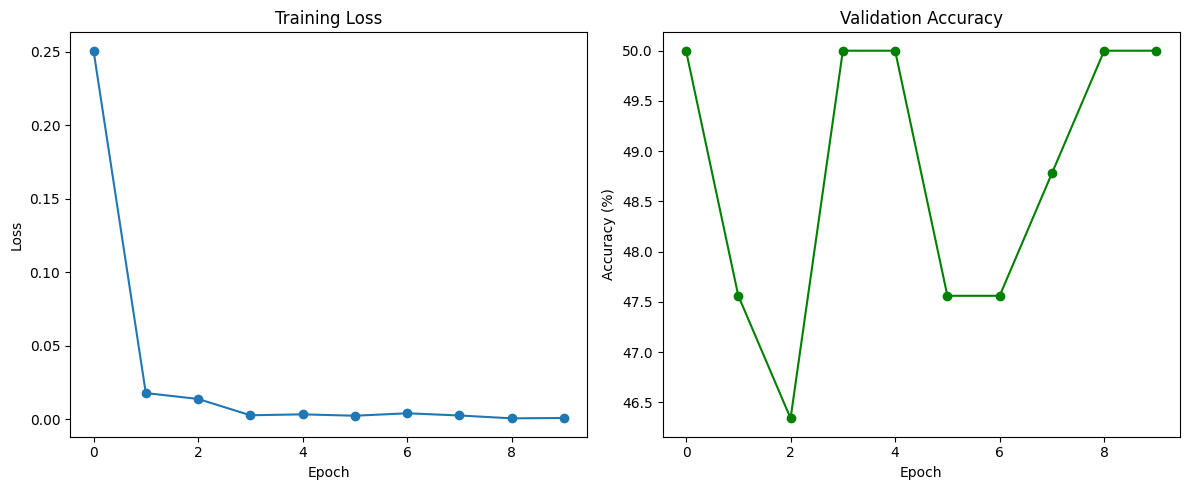

In [9]:
# Use GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

train_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train", transform=transform)
val_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Test", transform=transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample:
            identity = self.downsample(x)
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return self.relu(out)

class ResNet18(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, 7, 2, 3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(3, 2, 1)
        self.layer1 = self._make_layer(64, 2)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, 1, stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        layers = [BasicBlock(self.in_channels, out_channels, stride, downsample)]
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x).view(x.size(0), -1)
        return self.fc(x)

# Instantiate and train
ResNet = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ResNet.parameters(), lr=0.001)

train_losses = []
val_accuracies = []
epochs = 10

for epoch in range(epochs):
    ResNet.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = ResNet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    ResNet.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = ResNet(images)
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
    val_acc = 100 * correct / total
    val_accuracies.append(val_acc)
    print(f"[{epoch+1}/{epochs}] Loss: {train_loss:.4f} | Val Acc: {val_acc:.2f}%")

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, marker='o', color='green')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.tight_layout()
plt.show()


In [18]:
from torchsummary import summary

model = ResNet18(num_classes=2).to(device)

# print summary
summary(model, input_size=(3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [15]:
print(ResNet)

ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)


d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Epoch 1/10] - Loss: 0.5231 - Val Accuracy: 60.98%
[Epoch 2/10] - Loss: 0.0345 - Val Accuracy: 84.15%
[Epoch 3/10] - Loss: 0.0138 - Val Accuracy: 90.24%
[Epoch 4/10] - Loss: 0.0070 - Val Accuracy: 89.02%
[Epoch 5/10] - Loss: 0.0042 - Val Accuracy: 85.37%
[Epoch 6/10] - Loss: 0.0015 - Val Accuracy: 79.27%
[Epoch 7/10] - Loss: 0.0037 - Val Accuracy: 85.37%
[Epoch 8/10] - Loss: 0.0033 - Val Accuracy: 92.68%
[Epoch 9/10] - Loss: 0.0012 - Val Accuracy: 90.24%
[Epoch 10/10] - Loss: 0.0018 - Val Accuracy: 93.90%


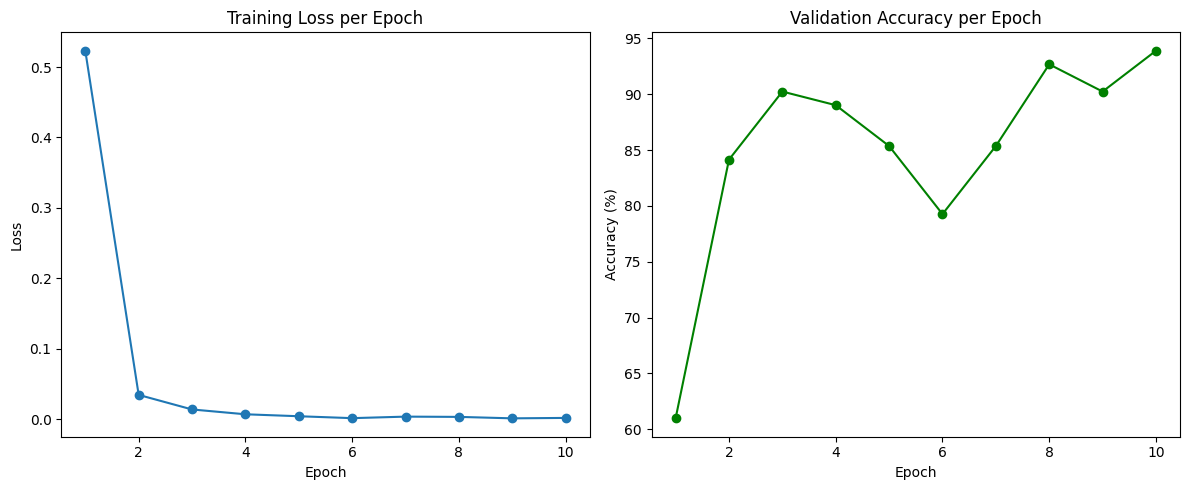

In [10]:
# Use GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # 3 channels
])

# Datapath
train_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train", transform=transform)
val_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Test", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# Pretrained ResNet
ResNetpre = models.resnet18(pretrained=True)
num_ftrs = ResNetpre.fc.in_features
ResNetpre.fc = nn.Linear(num_ftrs, 2)  # cow and horse

ResNetpre = ResNetpre.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ResNetpre.parameters(), lr=0.0001)

# Train loop
epochs = 10
train_losses = []
val_accuracies = []

for epoch in range(epochs):
    ResNetpre.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = ResNetpre(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    ResNetpre.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = ResNetpre(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"[Epoch {epoch+1}/{epochs}] - Loss: {train_loss:.4f} - Val Accuracy: {val_accuracy:.2f}%")

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), val_accuracies, marker='o', color='green')
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.tight_layout()
plt.show()


In [13]:
from torchvision.models import resnet18
from torchsummary import summary
import torch

model = resnet18(pretrained=True)

# Modified fully connected layer for binary classification (was 1000 classes)
model.fc = torch.nn.Linear(model.fc.in_features, 2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# print summary
summary(model, input_size=(3, 128, 128))


d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
       BasicBlock-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
             ReLU-14           [-1, 64,

## 3.ResNet+k-NN algorithm

nonparameteric model can avoid the overfitting problem so it maybe more accurate than deep learning model

🔍 Extracting features from real dataset...
🚀 Training resnetknn classifier on real dataset...
✅ resnetknn Validation Accuracy on real data: 84.15%


<Figure size 600x600 with 0 Axes>

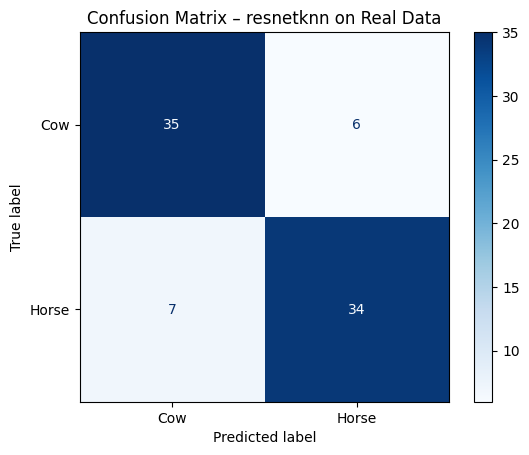

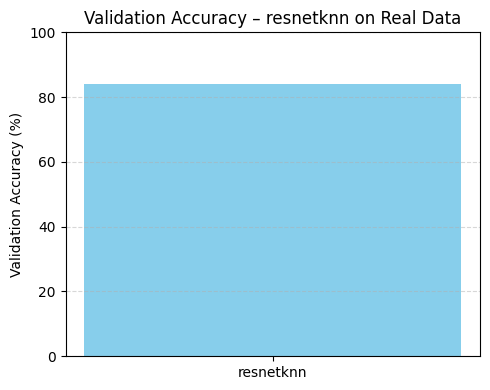

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transform for ResNet feature extraction
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Real data only
train_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train", transform=transform)
val_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Test", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=False)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# Use ResNet18 as a frozen feature extractor
resnetknn_feature_extractor = models.resnet18(pretrained=True)
resnetknn_feature_extractor.fc = nn.Identity() # 512 dimension
resnetknn_feature_extractor = resnetknn_feature_extractor.to(device)
resnetknn_feature_extractor.eval()

# Feature extraction function
def extract_features(dataloader):
    features, labels = [], []
    with torch.no_grad():
        for images, targets in dataloader:
            images = images.to(device)
            feats = resnetknn_feature_extractor(images).cpu().numpy()
            features.append(feats)
            labels.append(targets.numpy())
    return np.vstack(features), np.hstack(labels)

# Extract features from real training/validation sets
print("🔍 Extracting features from real dataset...")
X_train, y_train = extract_features(train_loader)
X_val, y_val = extract_features(val_loader)

# K-NN classifier
print("🚀 Training resnetknn classifier on real dataset...")
resnetknn = KNeighborsClassifier(n_neighbors=3)
resnetknn.fit(X_train, y_train)

# Predict and evaluate
y_pred = resnetknn.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"✅ resnetknn Validation Accuracy on real data: {acc * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_data.classes)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix – resnetknn on Real Data")
plt.show()

# Plot accuracy bar
plt.figure(figsize=(5, 4))
plt.bar(['resnetknn'], [acc * 100], color='skyblue')
plt.ylim(0, 100)
plt.ylabel("Validation Accuracy (%)")
plt.title("Validation Accuracy – resnetknn on Real Data")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Part II: GANs(2025.4.1)**

## 1.DCGAN(Deep Convolutional GAN)

initial version of GAN

deep convolutional GAN use standard common CNN 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
from torch.nn.utils import spectral_norm
import matplotlib.pyplot as plt

import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create directory to save generated images
os.makedirs("generated", exist_ok=True)

# Datapath, only cow
cow_dir = "C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train\\Cow"

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize(64),        # Resize to 64x64
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
])

# Define
class CowOnlyDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.image_files = [f for f in os.listdir(root_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, 0

# Load data
dataset = CowOnlyDataset(cow_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)


In [ ]:
# Datapath, only horse
horse_dir = "C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train\\Horse"

# Data preprocessing
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
])

# Define
class HorseOnlyDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.image_files = [f for f in os.listdir(root_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, 1  # Returns label=1 for compatibility purposes only

# Load data
horse_dataset = HorseOnlyDataset(horse_dir, transform=transform)
horse_loader = DataLoader(horse_dataset, batch_size=128, shuffle=True)


Epoch [1/1000] | Loss_D: 1.6669 | Loss_G: 2.3120
Epoch [2/1000] | Loss_D: 1.1487 | Loss_G: 3.5956
Epoch [3/1000] | Loss_D: 0.4477 | Loss_G: 4.4767
Epoch [4/1000] | Loss_D: 0.2113 | Loss_G: 4.6404
Epoch [5/1000] | Loss_D: 0.2323 | Loss_G: 4.6336
Epoch [6/1000] | Loss_D: 0.2481 | Loss_G: 4.9271
Epoch [7/1000] | Loss_D: 0.1946 | Loss_G: 5.1568
Epoch [8/1000] | Loss_D: 0.1477 | Loss_G: 5.2914
Epoch [9/1000] | Loss_D: 0.1308 | Loss_G: 5.4900
Epoch [10/1000] | Loss_D: 0.0880 | Loss_G: 5.5642
Epoch [11/1000] | Loss_D: 0.0950 | Loss_G: 5.7729
Epoch [12/1000] | Loss_D: 0.0757 | Loss_G: 5.8085
Epoch [13/1000] | Loss_D: 0.0757 | Loss_G: 5.8635
Epoch [14/1000] | Loss_D: 0.0642 | Loss_G: 5.8835
Epoch [15/1000] | Loss_D: 0.0726 | Loss_G: 6.1137
Epoch [16/1000] | Loss_D: 0.0536 | Loss_G: 6.1122
Epoch [17/1000] | Loss_D: 0.0586 | Loss_G: 6.2421
Epoch [18/1000] | Loss_D: 0.0477 | Loss_G: 6.2023
Epoch [19/1000] | Loss_D: 0.0528 | Loss_G: 6.4289
Epoch [20/1000] | Loss_D: 0.0422 | Loss_G: 6.3802
Epoch [21

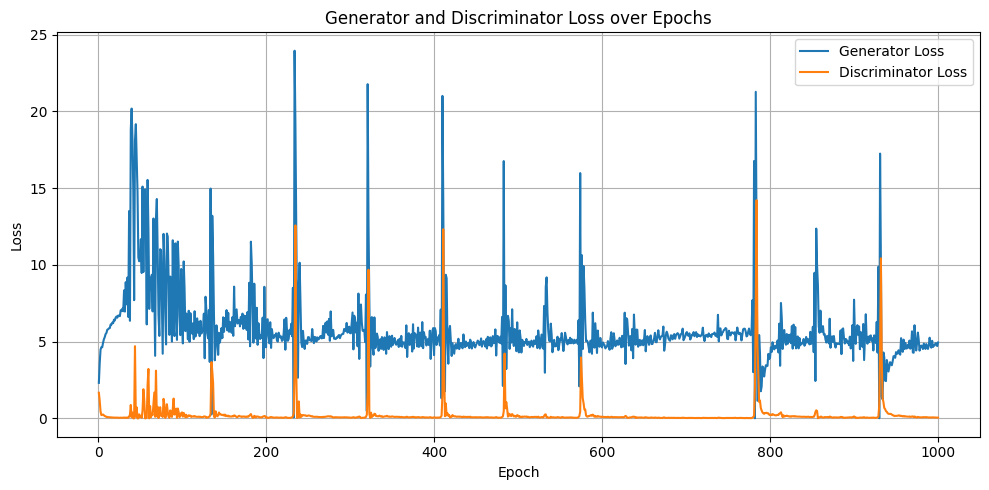

In [26]:
# Generator model
class Generator(nn.Module):
    def __init__(self, z_dim=16, img_channels=3, feature_g=64):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(z_dim, feature_g * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(feature_g * 8),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 8, feature_g * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 4, feature_g * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 2, feature_g, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g, img_channels, 4, 2, 1, bias=False),
            nn.Tanh()  # Output range [-1, 1]
        )

    def forward(self, x):
        return self.net(x)

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self, img_channels=3, feature_d=64):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(img_channels, feature_d, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d, feature_d * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 2, feature_d * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 4, feature_d * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()  # Output is probability
        )

    def forward(self, x):
        return self.net(x).view(-1, 1).squeeze(1)

# Initialize models
z_dim = 16
GANgenerator = Generator(z_dim=z_dim).to(device)
GANdiscriminator = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(GANgenerator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_d = optim.Adam(GANdiscriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Fixed noise for preview
fixed_noise = torch.randn(64, z_dim, 1, 1, device=device)

# Training loop
epochs = 1000
losses_g_DCGAN = []
losses_d_DCGAN = []

for epoch in range(epochs):
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Real and fake labels
        real_labels = torch.ones(batch_size, device=device)
        fake_labels = torch.zeros(batch_size, device=device)

        # ========== Train Discriminator ==========
        noise = torch.randn(batch_size, z_dim, 1, 1, device=device)
        fake_images = GANgenerator(noise)

        # Discriminator loss
        output_real = GANdiscriminator(real_images)
        loss_real = criterion(output_real, real_labels)

        output_fake = GANdiscriminator(fake_images.detach())
        loss_fake = criterion(output_fake, fake_labels)

        loss_d = loss_real + loss_fake

        GANdiscriminator.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # ========== Train Generator ==========
        output = GANdiscriminator(fake_images)
        loss_g = criterion(output, real_labels)  # Generator tries to fool discriminator

        GANgenerator.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    losses_g_DCGAN.append(loss_g.item())
    losses_d_DCGAN.append(loss_d.item())

    print(f"Epoch [{epoch+1}/{epochs}] | Loss_D: {loss_d.item():.4f} | Loss_G: {loss_g.item():.4f}")

    # Save preview images every few epochs
    if (epoch + 1) % 100 == 0:
        with torch.no_grad():
            fake_preview = GANgenerator(fixed_noise).detach().cpu()
        grid = utils.make_grid(fake_preview, padding=2, normalize=True)
        utils.save_image(grid, f"generated/epoch_{epoch+1}.png")

print("Training complete. Check the 'generated/' folder for generated samples.")

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), losses_g_DCGAN, label='Generator Loss')
plt.plot(range(1, epochs + 1), losses_d_DCGAN, label='Discriminator Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Generator and Discriminator Loss over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
summary(GANgenerator, input_size=(z_dim, 1, 1))
summary(GANdiscriminator, input_size=(3, 64, 64))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 512, 4, 4]         131,072
       BatchNorm2d-2            [-1, 512, 4, 4]           1,024
              ReLU-3            [-1, 512, 4, 4]               0
   ConvTranspose2d-4            [-1, 256, 8, 8]       2,097,152
       BatchNorm2d-5            [-1, 256, 8, 8]             512
              ReLU-6            [-1, 256, 8, 8]               0
   ConvTranspose2d-7          [-1, 128, 16, 16]         524,288
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
  ConvTranspose2d-10           [-1, 64, 32, 32]         131,072
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
  ConvTranspose2d-13            [-1, 3, 64, 64]           3,072
             Tanh-14            [-1, 3,

## 2.Conditional GAN(2025.4.7)

put the label in cows and horses

as the principal method to expand the dataset

### BCE loss

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

[Epoch 1/1000] Loss_D: 1.5249 | Loss_G: 0.6789
[Epoch 2/1000] Loss_D: 1.6288 | Loss_G: 0.6137
[Epoch 3/1000] Loss_D: 1.3743 | Loss_G: 0.8148
[Epoch 4/1000] Loss_D: 1.3208 | Loss_G: 0.9023
[Epoch 5/1000] Loss_D: 1.1381 | Loss_G: 1.0677
[Epoch 6/1000] Loss_D: 0.9810 | Loss_G: 1.2059
[Epoch 7/1000] Loss_D: 0.9320 | Loss_G: 1.1723
[Epoch 8/1000] Loss_D: 1.0153 | Loss_G: 1.1067
[Epoch 9/1000] Loss_D: 0.8229 | Loss_G: 1.4469
[Epoch 10/1000] Loss_D: 0.8459 | Loss_G: 1.3885
[Epoch 11/1000] Loss_D: 0.7996 | Loss_G: 1.4743
[Epoch 12/1000] Loss_D: 0.7683 | Loss_G: 1.4934
[Epoch 13/1000] Loss_D: 0.8744 | Loss_G: 1.3304
[Epoch 14/1000] Loss_D: 0.7914 | Loss_G: 1.4219
[Epoch 15/1000] Loss_D: 0.8211 | Loss_G: 1.4742
[Epoch 16/1000] Loss_D: 0.7846 | Loss_G: 1.4561
[Epoch 17/1000] Loss_D: 0.6790 | Loss_G: 1.7797
[Epoch 18/1000] Loss_D: 0.7676 | Loss_G: 1.5236
[Epoch 19/1000] Loss_D: 0.7777 | Loss_G: 1.5642
[Epoch 20/1000] Loss_D: 0.7637 | Loss_G: 1.4271
[Epoch 21/1000] Loss_D: 0.8449 | Loss_G: 1.3761
[

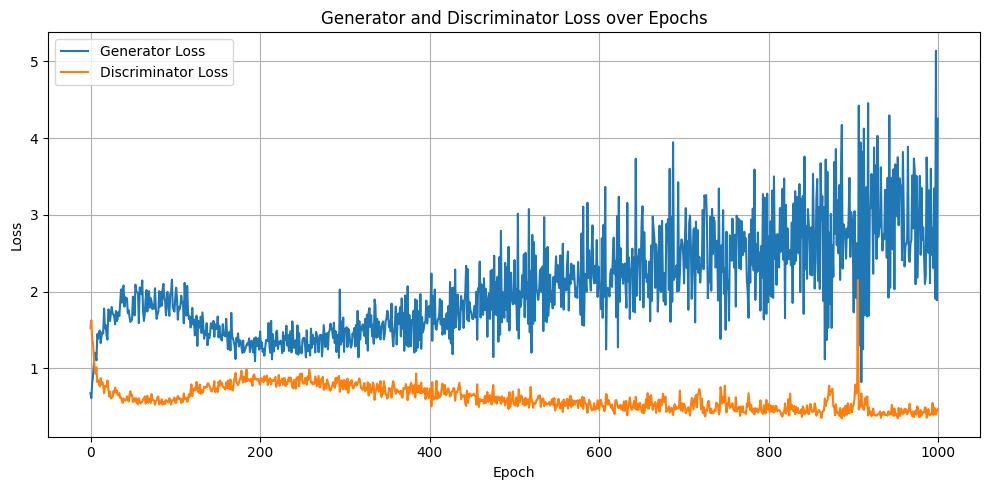

In [22]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create output directory
os.makedirs("generated_cGAN", exist_ok=True)

# Transform
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Dataset: Train contains Cow/ and Horse/ folders
dataset = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Hyperparameters
z_dim = 16
num_classes = 2
lr = 2e-5
epochs = 1000
classes = {0: "cow", 1: "horse"}

# ----------------- Generator -----------------
class ConditionalGenerator(nn.Module):
    def __init__(self, z_dim=32, img_channels=3, feature_g=64, num_classes=2):
        super().__init__()
        self.z_dim = z_dim
        self.label_embed = nn.Embedding(num_classes, z_dim)

        self.net = nn.Sequential(
            nn.ConvTranspose2d(z_dim, feature_g * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(feature_g * 8), nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 8, feature_g * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 4), nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 4, feature_g * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 2), nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 2, feature_g, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g), nn.ReLU(True),

            nn.ConvTranspose2d(feature_g, img_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_emb = self.label_embed(labels)
        x = noise * label_emb
        x = x.view(-1, self.z_dim, 1, 1)
        return self.net(x)

# ----------------- Discriminator -----------------
class ConditionalDiscriminator(nn.Module):
    def __init__(self, img_channels=3, feature_d=64, num_classes=2):
        super().__init__()
        self.label_embed = nn.Embedding(num_classes, 64 * 64)

        self.net = nn.Sequential(
            nn.Conv2d(img_channels + 1, feature_d, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d, feature_d * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 2), nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 2, feature_d * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 4), nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 4, feature_d * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 8), nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        batch_size = img.size(0)
        label_map = self.label_embed(labels).view(batch_size, 1, 64, 64)
        x = torch.cat([img, label_map], dim=1)
        return self.net(x).view(-1)

# Initialize models
cgenerator = ConditionalGenerator(z_dim=z_dim).to(device)
cdiscriminator = ConditionalDiscriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(cgenerator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_d = optim.SGD(cdiscriminator.parameters(), lr=1e-4, momentum=0.9)

# Training loop
losses_g_cGAN = []
losses_d_cGAN = []

for epoch in range(epochs):
    for real_imgs, labels in dataloader:
        real_imgs, labels = real_imgs.to(device), labels.to(device)
        batch_size = real_imgs.size(0)

        real_targets = torch.full((batch_size,), 0.9, device=device)  # real label = 0.9, smooth lable
        fake_targets = torch.zeros(batch_size, device=device)

        # Train Discriminator
        noise = torch.randn(batch_size, z_dim, device=device)
        fake_imgs = cgenerator(noise, labels)

        d_real = cdiscriminator(real_imgs, labels)
        d_fake = cdiscriminator(fake_imgs.detach(), labels)

        loss_d = criterion(d_real, real_targets) + criterion(d_fake, fake_targets)
        cdiscriminator.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # Train Generator
        output = cdiscriminator(fake_imgs, labels)
        loss_g = criterion(output, real_targets)
        cgenerator.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    losses_g_cGAN.append(loss_g.item())
    losses_d_cGAN.append(loss_d.item())

    print(f"[Epoch {epoch+1}/{epochs}] Loss_D: {loss_d.item():.4f} | Loss_G: {loss_g.item():.4f}")

    # Save different cow/horse images (from different z) every 100 epochs
    if (epoch + 1) % 100 == 0:
        cgenerator.eval()
        with torch.no_grad():
            for class_id, class_name in classes.items():
                z = torch.randn(64, z_dim, device=device)
                labels = torch.full((64,), class_id, dtype=torch.long, device=device)
                fake_imgs = cgenerator(z, labels).cpu()
                grid = utils.make_grid(fake_imgs, nrow=8, normalize=True)
                utils.save_image(grid, f"generated_cGAN/{class_name}_epoch{epoch+1}.png")

plt.figure(figsize=(10, 5))
plt.plot(losses_g_cGAN, label='Generator Loss')
plt.plot(losses_d_cGAN, label='Discriminator Loss')
plt.title("Generator and Discriminator Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Perceptual loss

try to make a breakthrough bc BCE loss have many noise but the result seems worse......

improve the texture and the detail of the image

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
from torch.nn.utils import spectral_norm
import torchvision.models as models
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os

d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Epoch 1/1000] Loss_D: 0.5844 | Loss_G: 3.0597
[Epoch 2/1000] Loss_D: 0.3856 | Loss_G: 3.3431
[Epoch 3/1000] Loss_D: 0.3826 | Loss_G: 3.4746
[Epoch 4/1000] Loss_D: 0.3657 | Loss_G: 3.5682
[Epoch 5/1000] Loss_D: 0.3684 | Loss_G: 3.5433
[Epoch 6/1000] Loss_D: 0.3617 | Loss_G: 3.8449
[Epoch 7/1000] Loss_D: 0.3487 | Loss_G: 3.9988
[Epoch 8/1000] Loss_D: 0.3542 | Loss_G: 3.7716
[Epoch 9/1000] Loss_D: 0.3505 | Loss_G: 3.9706
[Epoch 10/1000] Loss_D: 0.3513 | Loss_G: 3.9120
[Epoch 11/1000] Loss_D: 0.3566 | Loss_G: 4.4459
[Epoch 12/1000] Loss_D: 0.3566 | Loss_G: 4.5931
[Epoch 13/1000] Loss_D: 0.3576 | Loss_G: 4.0878
[Epoch 14/1000] Loss_D: 0.3914 | Loss_G: 3.2196
[Epoch 15/1000] Loss_D: 0.3764 | Loss_G: 5.1350
[Epoch 16/1000] Loss_D: 0.3532 | Loss_G: 4.8545
[Epoch 17/1000] Loss_D: 0.4180 | Loss_G: 4.1430
[Epoch 18/1000] Loss_D: 0.3617 | Loss_G: 4.8443
[Epoch 19/1000] Loss_D: 0.3867 | Loss_G: 3.9501
[Epoch 20/1000] Loss_D: 0.3555 | Loss_G: 4.3237
[Epoch 21/1000] Loss_D: 0.3548 | Loss_G: 4.3849
[

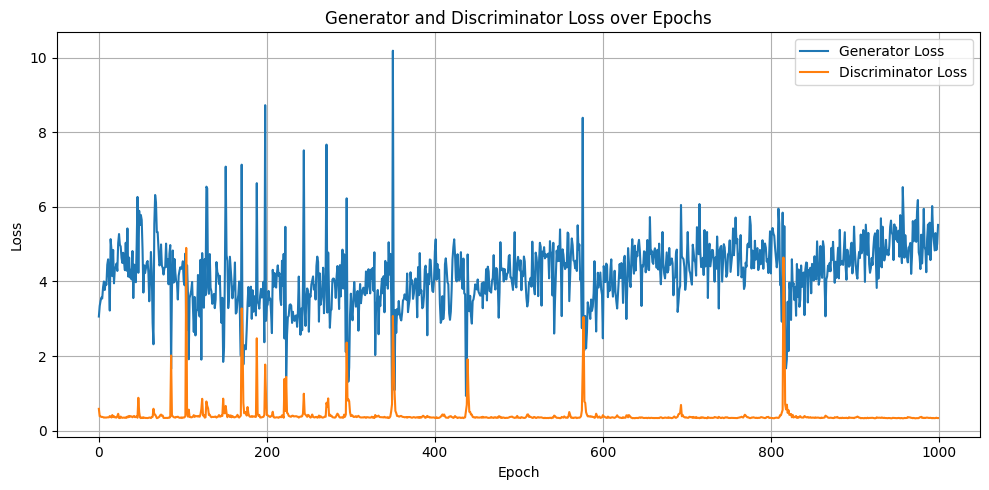

In [19]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
os.makedirs("generated_cGAN_perceptual", exist_ok=True)

# Transform
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Match Tanh output range
])

# Dataset
dataset = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Hyperparameters
z_dim = 16
num_classes = 2
lr = 2e-5
epochs = 1000
classes = {0: "cow", 1: "horse"}

# ----------------- Generator -----------------
class ConditionalGenerator(nn.Module):
    def __init__(self, z_dim=32, img_channels=3, feature_g=64, num_classes=2):
        super().__init__()
        self.z_dim = z_dim
        self.label_embed = nn.Embedding(num_classes, z_dim)

        self.net = nn.Sequential(
            nn.ConvTranspose2d(z_dim, feature_g * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(feature_g * 8), nn.ReLU(True),
            nn.ConvTranspose2d(feature_g * 8, feature_g * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 4), nn.ReLU(True),
            nn.ConvTranspose2d(feature_g * 4, feature_g * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 2), nn.ReLU(True),
            nn.ConvTranspose2d(feature_g * 2, feature_g, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g), nn.ReLU(True),
            nn.ConvTranspose2d(feature_g, img_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_emb = self.label_embed(labels)
        x = noise * label_emb
        x = x.view(-1, self.z_dim, 1, 1)
        return self.net(x)

# ----------------- Discriminator -----------------
class ConditionalDiscriminator(nn.Module):
    def __init__(self, img_channels=3, feature_d=64, num_classes=2):
        super().__init__()
        self.label_embed = nn.Embedding(num_classes, 64 * 64)
        self.net = nn.Sequential(
            nn.Conv2d(img_channels + 1, feature_d, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_d, feature_d * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 2), nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_d * 2, feature_d * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 4), nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_d * 4, feature_d * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 8), nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(feature_d * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        batch_size = img.size(0)
        label_map = self.label_embed(labels).view(batch_size, 1, 64, 64)
        x = torch.cat([img, label_map], dim=1)
        return self.net(x).view(-1)

# ----------------- Model init -----------------
cgenerator_perceptual = ConditionalGenerator(z_dim=z_dim).to(device)
cdiscriminator_perceptual = ConditionalDiscriminator().to(device)

# ----------------- VGG for perceptual loss -----------------
vgg = models.vgg16(pretrained=True).features[:16].to(device).eval()
for param in vgg.parameters():
    param.requires_grad = False

# ----------------- Loss & optimizers -----------------
criterion = nn.BCELoss()
optimizer_g = optim.Adam(cgenerator_perceptual.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_d = optim.Adam(cdiscriminator_perceptual.parameters(), lr=1e-4, betas=(0.5, 0.999))

# ----------------- Training loop -----------------
losses_g_cGAN_perceptual = []
losses_d_cGAN_perceptual = []

for epoch in range(epochs):
    for real_imgs, labels in dataloader:
        real_imgs, labels = real_imgs.to(device), labels.to(device)
        batch_size = real_imgs.size(0)

        real_targets = torch.full((batch_size,), 0.9, device=device)  # smooth label
        fake_targets = torch.zeros(batch_size, device=device)

        # Train Discriminator
        noise = torch.randn(batch_size, z_dim, device=device)
        fake_imgs = cgenerator_perceptual(noise, labels)
        d_real = cdiscriminator_perceptual(real_imgs, labels)
        d_fake = cdiscriminator_perceptual(fake_imgs.detach(), labels)
        loss_d = criterion(d_real, real_targets) + criterion(d_fake, fake_targets)

        cdiscriminator_perceptual.zero_grad()
        loss_d.backward()
        optimizer_d.step()

        # Train Generator
        output = cdiscriminator_perceptual(fake_imgs, labels)
        adv_loss = criterion(output, real_targets)

        # Perceptual loss with VGG features
        fake_resized = F.interpolate(fake_imgs, size=(224, 224), mode='bilinear', align_corners=False)
        real_resized = F.interpolate(real_imgs, size=(224, 224), mode='bilinear', align_corners=False)
        fake_feats = vgg(fake_resized)
        real_feats = vgg(real_resized)
        percep_loss = F.l1_loss(fake_feats, real_feats)

        loss_g = adv_loss + 0.1 * percep_loss  # You can tune the weight

        cgenerator_perceptual.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    losses_g_cGAN_perceptual.append(loss_g.item())
    losses_d_cGAN_perceptual.append(loss_d.item())

    print(f"[Epoch {epoch+1}/{epochs}] Loss_D: {loss_d.item():.4f} | Loss_G: {loss_g.item():.4f}")

    if (epoch + 1) % 100 == 0:
        cgenerator_perceptual.eval()
        with torch.no_grad():
            for class_id, class_name in classes.items():
                z = torch.randn(64, z_dim, device=device)
                labels_batch = torch.full((64,), class_id, dtype=torch.long, device=device)
                fake_imgs = cgenerator_perceptual(z, labels_batch).cpu()
                grid = utils.make_grid(fake_imgs, nrow=8, normalize=True)
                utils.save_image(grid, f"generated_cGAN_perceptual/{class_name}_epoch{epoch+1}.png")

# ----------------- Plotting -----------------
plt.figure(figsize=(10, 5))
plt.plot(losses_g_cGAN_perceptual, label='Generator Loss')
plt.plot(losses_d_cGAN_perceptual, label='Discriminator Loss')
plt.title("Generator and Discriminator Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### WGAN-GP loss

Wasserstein Generative Adversarial Network with Gradient Penalty

wanna improve the loss function so instead of using BCE and perceptual loss, I create my loss function by implementing WGAN-GP.

I found that when the gradient penalty is increasing, the loss curve will be more stable.

[Epoch 1/1000] Loss_D: -15.2505 | Loss_G: 4.2266
[Epoch 2/1000] Loss_D: -27.4206 | Loss_G: 9.5909
[Epoch 3/1000] Loss_D: -38.1277 | Loss_G: 15.1228
[Epoch 4/1000] Loss_D: -46.2343 | Loss_G: 22.2560
[Epoch 5/1000] Loss_D: -50.5589 | Loss_G: 24.6470
[Epoch 6/1000] Loss_D: -58.0907 | Loss_G: 28.4966
[Epoch 7/1000] Loss_D: -61.6058 | Loss_G: 29.1025
[Epoch 8/1000] Loss_D: -64.1941 | Loss_G: 34.3846
[Epoch 9/1000] Loss_D: -63.0271 | Loss_G: 33.1579
[Epoch 10/1000] Loss_D: -70.5939 | Loss_G: 38.0021
[Epoch 11/1000] Loss_D: -64.6000 | Loss_G: 36.4864
[Epoch 12/1000] Loss_D: -67.8059 | Loss_G: 38.0357
[Epoch 13/1000] Loss_D: -68.7777 | Loss_G: 37.1924
[Epoch 14/1000] Loss_D: -68.0595 | Loss_G: 35.9339
[Epoch 15/1000] Loss_D: -68.1611 | Loss_G: 31.2292
[Epoch 16/1000] Loss_D: -65.6522 | Loss_G: 31.8275
[Epoch 17/1000] Loss_D: -63.8563 | Loss_G: 34.6394
[Epoch 18/1000] Loss_D: -66.4795 | Loss_G: 37.9519
[Epoch 19/1000] Loss_D: -63.8590 | Loss_G: 40.9455
[Epoch 20/1000] Loss_D: -65.0221 | Loss_G:

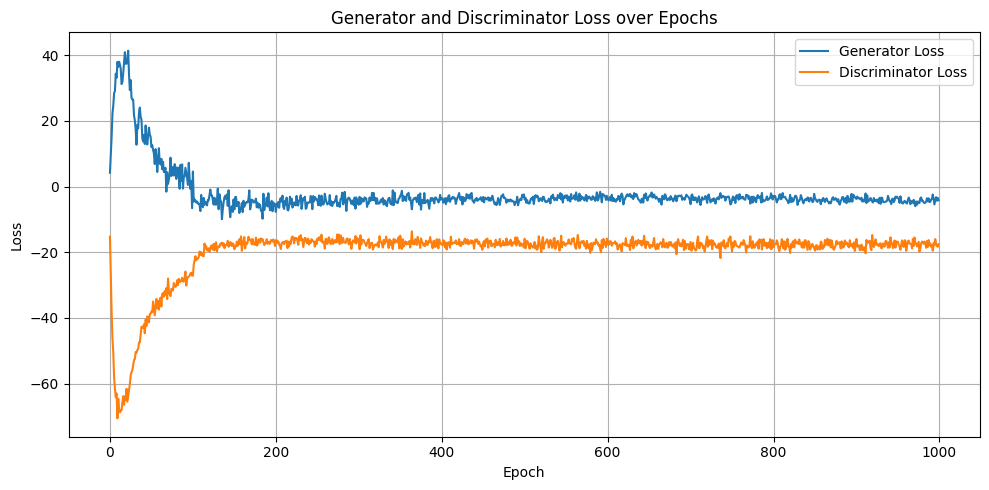

In [27]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create output directory
os.makedirs("generated_cGAN_wgan", exist_ok=True)

# Transform
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Dataset: Train contains Cow/ and Horse/ folders
dataset = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Hyperparameters
z_dim = 64
num_classes = 2
lr = 2e-5
epochs = 1000
classes = {0: "cow", 1: "horse"}
lambda_gp = 20 # Gradient Penalty
n_critic = 2   # Number of discriminator updates vs. 1 for generator

# ----------------- Generator -----------------
class ConditionalGenerator(nn.Module):
    def __init__(self, z_dim=200, img_channels=3, feature_g=64, num_classes=2):
        super().__init__()
        self.z_dim = z_dim
        self.label_embed = nn.Embedding(num_classes, z_dim)

        self.net = nn.Sequential(
            nn.ConvTranspose2d(z_dim, feature_g * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(feature_g * 8), nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 8, feature_g * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 4), nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 4, feature_g * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 2), nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 2, feature_g, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g), nn.ReLU(True),

            nn.ConvTranspose2d(feature_g, img_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_emb = self.label_embed(labels)
        x = noise * label_emb
        x = x.view(-1, self.z_dim, 1, 1)
        return self.net(x)

# ----------------- Discriminator -----------------
class ConditionalDiscriminator(nn.Module):
    def __init__(self, img_channels=3, feature_d=64, num_classes=2):
        super().__init__()
        self.label_embed = nn.Embedding(num_classes, 64 * 64)

        self.net = nn.Sequential(
            spectral_norm(nn.Conv2d(img_channels + 1, feature_d, 4, 2, 1, bias=False)),
            nn.LeakyReLU(0.2),

            spectral_norm(nn.Conv2d(feature_d, feature_d * 2, 4, 2, 1, bias=False)),
            nn.InstanceNorm2d(feature_d * 2),
            nn.LeakyReLU(0.2),

            spectral_norm(nn.Conv2d(feature_d * 2, feature_d * 4, 4, 2, 1, bias=False)),
            nn.InstanceNorm2d(feature_d * 4),
            nn.LeakyReLU(0.2),

            spectral_norm(nn.Conv2d(feature_d * 4, feature_d * 8, 4, 2, 1, bias=False)),
            nn.InstanceNorm2d(feature_d * 8),
            nn.LeakyReLU(0.2),
            
            spectral_norm(nn.Conv2d(feature_d * 8, 1, 4, 1, 0, bias=False))
        )

    def forward(self, img, labels):
        batch_size = img.size(0)
        label_map = self.label_embed(labels).view(batch_size, 1, 64, 64)
        x = torch.cat([img, label_map], dim=1)
        return self.net(x).view(-1)


# WGAN-GP function
def compute_gradient_penalty(D, real_samples, fake_samples, labels):
    batch_size = real_samples.size(0)
    # Generate random interpolation coefficients
    alpha = torch.rand(batch_size, 1, 1, 1).to(real_samples.device)
    # Creating interpolated samples
    interpolates = (alpha * real_samples + (1 - alpha) * fake_samples).requires_grad_(True)
    # Compute the output of the discriminator for interpolated samples
    d_interpolates = D(interpolates, labels)
    # Calculating the gradient
    gradients = torch.autograd.grad(
        outputs=d_interpolates,
        inputs=interpolates,
        grad_outputs=torch.ones_like(d_interpolates),
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )[0]
    gradients = gradients.view(gradients.size(0), -1)
    # Compute the gradient penalty term
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty


# Initialize models
cgenerator_wgan = ConditionalGenerator(z_dim=z_dim).to(device)
cdiscriminator_wgan = ConditionalDiscriminator().to(device)

# Loss and optimizers
optimizer_g = optim.Adam(cgenerator_wgan.parameters(), lr=lr, betas=(0.0, 0.99))
optimizer_d = optim.Adam(cdiscriminator_wgan.parameters(), lr=1e-4, betas=(0.0, 0.99))

# Training loop
losses_g_cGAN_wgan = []
losses_d_cGAN_wgan = []

scheduler_g = torch.optim.lr_scheduler.StepLR(optimizer_g, step_size=100, gamma=0.95)
scheduler_d = torch.optim.lr_scheduler.StepLR(optimizer_d, step_size=100, gamma=0.95)

for epoch in range(epochs):
    for real_imgs, labels in dataloader:
        real_imgs, labels = real_imgs.to(device), labels.to(device)
        batch_size = real_imgs.size(0)

        # ===== Training discriminator =====
        for _ in range(n_critic):
            # Generation of fake samples
            noise = torch.randn(batch_size, z_dim, device=device)
            fake_imgs = cgenerator_wgan(noise, labels)
            
            # Calculation of discriminator loss
            d_real = cdiscriminator_wgan(real_imgs, labels)
            d_fake = cdiscriminator_wgan(fake_imgs.detach(), labels)
            loss_d = -torch.mean(d_real) + torch.mean(d_fake)
            
            # Compute the gradient penalty
            gp = compute_gradient_penalty(cdiscriminator_wgan, real_imgs, fake_imgs.data, labels)
            loss_d += lambda_gp * gp
            
            # Updating the discriminator
            cdiscriminator_wgan.zero_grad()
            loss_d.backward()
            optimizer_d.step()
        
        # ===== Training generator =====
        # Generation of fake samples
        noise = torch.randn(batch_size, z_dim, device=device)
        fake_imgs = cgenerator_wgan(noise, labels)
        
        # Calculate generator loss
        d_fake = cdiscriminator_wgan(fake_imgs, labels)
        loss_g = -torch.mean(d_fake)
        
        # Update Generator
        cgenerator_wgan.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    scheduler_g.step()
    scheduler_d.step()

    losses_g_cGAN_wgan.append(loss_g.item())
    losses_d_cGAN_wgan.append(loss_d.item())

    print(f"[Epoch {epoch+1}/{epochs}] Loss_D: {loss_d.item():.4f} | Loss_G: {loss_g.item():.4f}")

    # Save different cow/horse images (from different z) every 100 epochs
    if (epoch + 1) % 100 == 0:
        cgenerator_wgan.eval()
        with torch.no_grad():
            for class_id, class_name in classes.items():
                z = torch.randn(64, z_dim, device=device)
                labels = torch.full((64,), class_id, dtype=torch.long, device=device)
                fake_imgs = cgenerator_wgan(z, labels).cpu()
                grid = utils.make_grid(fake_imgs, nrow=8, normalize=True)
                utils.save_image(grid, f"generated_cGAN_wgan/{class_name}_epoch{epoch+1}.png")

plt.figure(figsize=(10, 5))
plt.plot(losses_g_cGAN_wgan, label='Generator Loss')
plt.plot(losses_d_cGAN_wgan, label='Discriminator Loss')
plt.title("Generator and Discriminator Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### WGAN-GP+ResNet

Now, since unsatisfied results when modifying the loss function, I think maybe the model itself is not good enough. Thus, I try ResNet architechture. The result is nearly the same as CNN model

[Epoch 1/1000] Loss_D: -5.3842 | Loss_G: -0.2826
[Epoch 2/1000] Loss_D: -13.1921 | Loss_G: 0.1154
[Epoch 3/1000] Loss_D: -19.3243 | Loss_G: 2.2419
[Epoch 4/1000] Loss_D: -24.5828 | Loss_G: 4.6734
[Epoch 5/1000] Loss_D: -28.9978 | Loss_G: 6.4429
[Epoch 6/1000] Loss_D: -31.9454 | Loss_G: 8.1715
[Epoch 7/1000] Loss_D: -36.2107 | Loss_G: 8.7869
[Epoch 8/1000] Loss_D: -38.0938 | Loss_G: 13.6153
[Epoch 9/1000] Loss_D: -41.1766 | Loss_G: 16.5945
[Epoch 10/1000] Loss_D: -43.1800 | Loss_G: 16.1226
[Epoch 11/1000] Loss_D: -47.8868 | Loss_G: 20.3329
[Epoch 12/1000] Loss_D: -50.9576 | Loss_G: 24.8687
[Epoch 13/1000] Loss_D: -52.9598 | Loss_G: 26.3076
[Epoch 14/1000] Loss_D: -53.2175 | Loss_G: 23.6873
[Epoch 15/1000] Loss_D: -54.2618 | Loss_G: 23.9958
[Epoch 16/1000] Loss_D: -55.5782 | Loss_G: 31.8690
[Epoch 17/1000] Loss_D: -55.5897 | Loss_G: 23.9969
[Epoch 18/1000] Loss_D: -57.9710 | Loss_G: 30.5795
[Epoch 19/1000] Loss_D: -56.7971 | Loss_G: 27.0962
[Epoch 20/1000] Loss_D: -60.6169 | Loss_G: 32.0

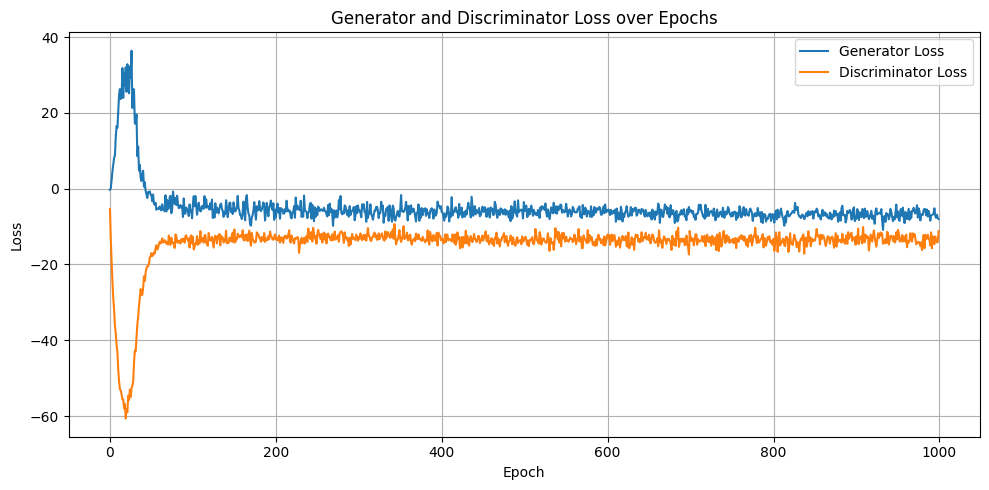

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create output directory
os.makedirs("generated_cGAN_wganres", exist_ok=True)

# Transform(for not pretrained ResNet)
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Dataset: Train contains Cow/ and Horse/ folders
dataset = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Hyperparameters
z_dim = 64
num_classes = 2
lr = 2e-5
epochs = 1000
classes = {0: "cow", 1: "horse"}
lambda_gp = 10 # Gradient Penalty
n_critic = 1   # Number of discriminator updates vs. 1 for generator

# ResNet definition
class ResnetBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.block = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(dim, dim, kernel_size=3),
            nn.InstanceNorm2d(dim),
            nn.ReLU(inplace=True),
            nn.ReflectionPad2d(1),
            nn.Conv2d(dim, dim, kernel_size=3),
            nn.InstanceNorm2d(dim)
        )

    def forward(self, x):
        return x + self.block(x)


# ----------------- Generator -----------------
class ConditionalGenerator(nn.Module):
    def __init__(self, z_dim=32, img_channels=3, feature_g=64, num_classes=2):
        super().__init__()
        self.z_dim = z_dim
        self.label_embed = nn.Embedding(num_classes, z_dim)

        self.fc = nn.Sequential(
            nn.Linear(z_dim, feature_g * 8 * 4 * 4),
            nn.ReLU(True)
        )

        self.initial_reshape = (feature_g * 8, 4, 4)

        self.res_blocks = nn.Sequential(
            ResnetBlock(feature_g * 8),
            ResnetBlock(feature_g * 8),
        )

        self.upsample_layers = nn.Sequential(
            nn.ConvTranspose2d(feature_g * 8, feature_g * 4, 4, 2, 1),  # 4→8
            nn.InstanceNorm2d(feature_g * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 4, feature_g * 2, 4, 2, 1),  # 8→16
            nn.InstanceNorm2d(feature_g * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 2, feature_g, 4, 2, 1),      # 16→32
            nn.InstanceNorm2d(feature_g),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g, img_channels, 4, 2, 1),       # 32→64
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Conditional Embedded Multiplication
        label_emb = self.label_embed(labels)
        x = noise * label_emb  # shape: [B, z_dim]
        x = self.fc(x)
        x = x.view(-1, *self.initial_reshape)  # shape: [B, C, H, W]
        x = self.res_blocks(x)
        x = self.upsample_layers(x)
        return x

# ----------------- Discriminator -----------------

# not pretrained
class ConditionalDiscriminator(nn.Module):
    def __init__(self, img_channels=3, feature_d=64, num_classes=2):
        super().__init__()
        self.label_embed = nn.Embedding(num_classes, 64 * 64)

        self.net = nn.Sequential(
            spectral_norm(nn.Conv2d(img_channels + 1, feature_d, 4, 2, 1, bias=False)),
            nn.LeakyReLU(0.2),

            spectral_norm(nn.Conv2d(feature_d, feature_d * 2, 4, 2, 1, bias=False)),
            nn.InstanceNorm2d(feature_d * 2),
            nn.LeakyReLU(0.2),

            spectral_norm(nn.Conv2d(feature_d * 2, feature_d * 4, 4, 2, 1, bias=False)),
            nn.InstanceNorm2d(feature_d * 4),
            nn.LeakyReLU(0.2),

            spectral_norm(nn.Conv2d(feature_d * 4, feature_d * 8, 4, 2, 1, bias=False)),
            nn.InstanceNorm2d(feature_d * 8),
            nn.LeakyReLU(0.2),
            
            spectral_norm(nn.Conv2d(feature_d * 8, 1, 4, 1, 0, bias=False))
        )

    def forward(self, img, labels):
        batch_size = img.size(0)
        label_map = self.label_embed(labels).view(batch_size, 1, 64, 64)
        x = torch.cat([img, label_map], dim=1)
        return self.net(x).view(-1)


# WGAN-GP function
def compute_gradient_penalty(D, real_samples, fake_samples, labels):
    batch_size = real_samples.size(0)
    # Generate random interpolation coefficients
    alpha = torch.rand(batch_size, 1, 1, 1).to(real_samples.device)
    # Creating interpolated samples
    interpolates = (alpha * real_samples + (1 - alpha) * fake_samples).requires_grad_(True)
    # Compute the output of the discriminator for interpolated samples
    d_interpolates = D(interpolates, labels)
    # Calculating the gradient
    gradients = torch.autograd.grad(
        outputs=d_interpolates,
        inputs=interpolates,
        grad_outputs=torch.ones_like(d_interpolates),
        create_graph=True,
        retain_graph=True,
        only_inputs=True,
    )[0]
    gradients = gradients.view(gradients.size(0), -1)
    # Compute the gradient penalty term
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty


# Initialize models
cgenerator_wganres = ConditionalGenerator(z_dim=z_dim).to(device)
cdiscriminator_wganres = ConditionalDiscriminator(num_classes=2).to(device)

# Loss and optimizers
optimizer_g = optim.Adam(cgenerator_wganres.parameters(), lr=lr, betas=(0.0, 0.99))
optimizer_d = optim.Adam(cdiscriminator_wganres.parameters(), lr=1e-4, betas=(0.0, 0.99))

# Training loop
losses_g_cGAN_wganres = []
losses_d_cGAN_wganres = []

scheduler_g = torch.optim.lr_scheduler.StepLR(optimizer_g, step_size=100, gamma=0.95)
scheduler_d = torch.optim.lr_scheduler.StepLR(optimizer_d, step_size=100, gamma=0.95)

for epoch in range(epochs):
    for real_imgs, labels in dataloader:
        real_imgs, labels = real_imgs.to(device), labels.to(device)
        batch_size = real_imgs.size(0)

        # ===== Training discriminator =====
        for _ in range(n_critic):
            # Generation of fake samples
            noise = torch.randn(batch_size, z_dim, device=device)
            fake_imgs = cgenerator_wganres(noise, labels)
            
            # Calculation of discriminator loss
            d_real = cdiscriminator_wganres(real_imgs, labels)
            d_fake = cdiscriminator_wganres(fake_imgs.detach(), labels)
            loss_d = -torch.mean(d_real) + torch.mean(d_fake)
            
            # Compute the gradient penalty
            gp = compute_gradient_penalty(cdiscriminator_wganres, real_imgs, fake_imgs.data, labels)
            loss_d += lambda_gp * gp
            
            # Updating the discriminator
            cdiscriminator_wganres.zero_grad()
            loss_d.backward()
            optimizer_d.step()
        
        # ===== Training generator =====
        # Generation of fake samples
        noise = torch.randn(batch_size, z_dim, device=device)
        fake_imgs = cgenerator_wganres(noise, labels)
        
        # Calculate generator loss
        d_fake = cdiscriminator_wganres(fake_imgs, labels)
        loss_g = -torch.mean(d_fake)
        
        # Update Generator
        cgenerator_wganres.zero_grad()
        loss_g.backward()
        optimizer_g.step()

    scheduler_g.step()
    scheduler_d.step()

    losses_g_cGAN_wganres.append(loss_g.item())
    losses_d_cGAN_wganres.append(loss_d.item())

    print(f"[Epoch {epoch+1}/{epochs}] Loss_D: {loss_d.item():.4f} | Loss_G: {loss_g.item():.4f}")

    # Save different cow/horse images (from different z) every 100 epochs
    if (epoch + 1) % 100 == 0:
        cgenerator_wganres.eval()
        with torch.no_grad():
            for class_id, class_name in classes.items():
                z = torch.randn(64, z_dim, device=device)
                labels = torch.full((64,), class_id, dtype=torch.long, device=device)
                fake_imgs = cgenerator_wganres(z, labels).cpu()
                grid = utils.make_grid(fake_imgs, nrow=8, normalize=True)
                utils.save_image(grid, f"generated_cGAN_wganres/{class_name}_epoch{epoch+1}.png")

plt.figure(figsize=(10, 5))
plt.plot(losses_g_cGAN_wganres, label='Generator Loss')
plt.plot(losses_d_cGAN_wganres, label='Discriminator Loss')
plt.title("Generator and Discriminator Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 3.Cycle GAN(2025.4.8)

Style transfer, implement the cycle GAN to the image and change the style

It shoule be noticed that this GAN is different from others, bc it won't be the dataset of the revalidation part. In addition, it is actually implemented directly in the original image to transfer the different color.

Epoch 10/10 G: 3.266 D_X: 0.293 D_Y: 0.241: 100%|██████████| 41/41 [00:15<00:00,  2.72it/s]


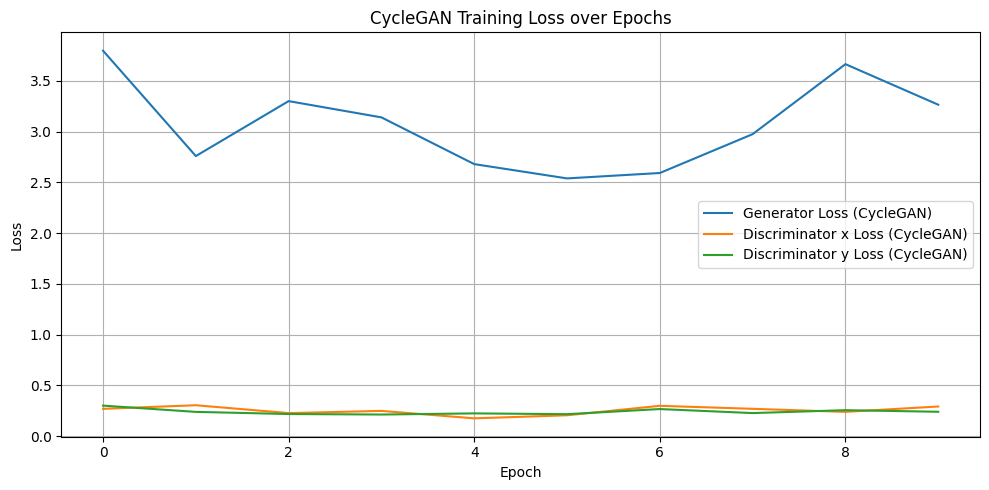

In [3]:
import os
import gc
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from tqdm import tqdm

# ========== Setup ==========
torch.cuda.empty_cache()
gc.collect()

DATA_PATH = r"C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
EPOCHS = 10
BATCH_SIZE = 1
IMAGE_SIZE = 256  # Higher resolution training
LAMBDA_CYCLE = 10
LAMBDA_ID = 5
G_LR = 2e-4
D_LR = 1e-4

# ========== Data preprocessing ==========
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(10)
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.ImageFolder(DATA_PATH, transform=transform)
class_names = dataset.classes
horse_data = [x for x in dataset if x[1] == class_names.index("Horse")]
cow_data = [x for x in dataset if x[1] == class_names.index("Cow")]
horse_loader = DataLoader(horse_data, batch_size=BATCH_SIZE, shuffle=True)
cow_loader = DataLoader(cow_data, batch_size=BATCH_SIZE, shuffle=True)

# ========== network infrastructure ==========
class ResnetBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.block = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(dim, dim, kernel_size=3),
            nn.InstanceNorm2d(dim),
            nn.ReLU(inplace=True),
            nn.ReflectionPad2d(1),
            nn.Conv2d(dim, dim, kernel_size=3),
            nn.InstanceNorm2d(dim)
        )

    def forward(self, x):
        return x + self.block(x)

class Generator(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, n_residual_blocks=9):
        super().__init__()
        model = [
            nn.ReflectionPad2d(3),
            nn.Conv2d(in_channels, 64, 7),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True)
        ]

        # Downsampling
        in_features = 64
        for out_features in [128, 256]:
            model += [
                nn.Conv2d(in_features, out_features, 3, stride=2, padding=1),
                nn.InstanceNorm2d(out_features),
                nn.ReLU(inplace=True)
            ]
            in_features = out_features

        # Residual blocks
        for _ in range(n_residual_blocks):
            model += [ResnetBlock(in_features)]

        # Upsampling
        for out_features in [128, 64]:
            model += [
                nn.ConvTranspose2d(in_features, out_features, 3, stride=2, padding=1, output_padding=1),
                nn.InstanceNorm2d(out_features),
                nn.ReLU(inplace=True)
            ]
            in_features = out_features

        model += [
            nn.ReflectionPad2d(3),
            nn.Conv2d(64, out_channels, 7),
            nn.Tanh()
        ]

        self.model = nn.Sequential(*model)

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        def block(in_filters, out_filters, normalize=True):
            layers = [nn.Conv2d(in_filters, out_filters, 4, 2, 1)]
            if normalize:
                layers.append(nn.InstanceNorm2d(out_filters))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(3, 64, normalize=False),
            *block(64, 128),
            *block(128, 256),
            *block(256, 512),
            nn.Conv2d(512, 1, 4, padding=1)
        )

    def forward(self, x):
        return self.model(x)

# Multi-scale discriminator encapsulation
class MultiScaleDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.D1 = Discriminator()
        self.D2 = Discriminator()

    def forward(self, x):
        x_small = F.interpolate(x, scale_factor=0.5, mode='bilinear', align_corners=True)
        return self.D1(x), self.D2(x_small)


# ========== Model initialization ==========
G = Generator().to(device)
F = Generator().to(device)
D_X = Discriminator().to(device)
D_Y = Discriminator().to(device)

criterion_GAN = nn.MSELoss()
criterion_cycle = nn.L1Loss()
criterion_identity = nn.L1Loss()

opt_G = torch.optim.Adam(itertools.chain(G.parameters(), F.parameters()), lr=G_LR, betas=(0.5, 0.999))
opt_D_X = torch.optim.Adam(D_X.parameters(), lr=D_LR, betas=(0.5, 0.999))
opt_D_Y = torch.optim.Adam(D_Y.parameters(), lr=D_LR, betas=(0.5, 0.999))

# ========== Main loop ==========

losses_g_cycle = []
losses_dx_cycle = []
losses_dy_cycle = []

for epoch in range(EPOCHS):
    pbar = tqdm(zip(horse_loader, cow_loader), total=min(len(horse_loader), len(cow_loader)))
    for (real_X, _), (real_Y, _) in pbar:
        real_X, real_Y = real_X.to(device), real_Y.to(device)
        valid = torch.ones_like(D_X(real_X)).to(device)
        fake = torch.zeros_like(valid)

        opt_G.zero_grad()

        id_X = F(real_X)
        id_Y = G(real_Y)
        loss_id = criterion_identity(id_X, real_X) + criterion_identity(id_Y, real_Y)

        fake_Y = G(real_X)
        fake_X = F(real_Y)
        loss_GAN = criterion_GAN(D_Y(fake_Y), valid) + criterion_GAN(D_X(fake_X), valid)

        rec_X = F(fake_Y)
        rec_Y = G(fake_X)
        loss_cycle = criterion_cycle(rec_X, real_X) + criterion_cycle(rec_Y, real_Y)

        loss_G = loss_GAN + LAMBDA_CYCLE * loss_cycle + LAMBDA_ID * loss_id
        loss_G.backward()
        opt_G.step()

        opt_D_X.zero_grad()
        loss_D_X = (criterion_GAN(D_X(real_X), valid) + criterion_GAN(D_X(fake_X.detach()), fake)) * 0.5
        loss_D_X.backward()
        opt_D_X.step()

        opt_D_Y.zero_grad()
        loss_D_Y = (criterion_GAN(D_Y(real_Y), valid) + criterion_GAN(D_Y(fake_Y.detach()), fake)) * 0.5
        loss_D_Y.backward()
        opt_D_Y.step()

        pbar.set_description(f"Epoch {epoch+1}/{EPOCHS} G: {loss_G.item():.3f} D_X: {loss_D_X.item():.3f} D_Y: {loss_D_Y.item():.3f}")
    losses_g_cycle.append(loss_G.item())
    losses_dx_cycle.append(loss_D_X.item())
    losses_dy_cycle.append(loss_D_Y.item())

plt.figure(figsize=(10, 5))
plt.plot(losses_g_cycle, label='Generator Loss (CycleGAN)')
plt.plot(losses_dx_cycle, label='Discriminator x Loss (CycleGAN)')
plt.plot(losses_dy_cycle, label='Discriminator y Loss (CycleGAN)')
plt.title("CycleGAN Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 1.Horse with cow color(G)

In [4]:
import os
import torch
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from tqdm import tqdm

# ===== Setup =====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G.eval()  # G is the trained generator: Horse → Cow

# ===== Transform for input images =====
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# ===== Load only horse images from dataset =====
dataset_path = "C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train"
real_dataset = ImageFolder(root=dataset_path, transform=transform)

# Check the class index mapping
print("Class-to-Index mapping:", real_dataset.class_to_idx)

# Extract only horse images (adjust key if needed based on actual folder names)
horse_class_idx = real_dataset.class_to_idx['Horse']  # Use exact case
horse_only = [item for item in real_dataset if item[1] == horse_class_idx]
horse_loader = DataLoader(horse_only, batch_size=1)

# ===== Output folder =====
save_dir = "result_horse_to_cow"
os.makedirs(save_dir, exist_ok=True)

# ===== Generate and save images =====
with torch.no_grad():
    for i, (img, _) in enumerate(tqdm(horse_loader)):
        img = img.to(device)
        fake_cow = G(img)  # Translate horse → cow-style
        fake_cow = (fake_cow + 1) / 2  # Denormalize to [0,1] for saving
        save_path = os.path.join(save_dir, f"horse_to_cow_{i+1}.png")
        save_image(fake_cow, save_path)

print(f"✅ Done: {len(horse_loader)} horse → cow-style images saved to '{save_dir}/'")



Class-to-Index mapping: {'Cow': 0, 'Horse': 1}


100%|██████████| 41/41 [00:01<00:00, 31.75it/s]

✅ Done: 41 horse → cow-style images saved to 'result_horse_to_cow/'


### 2.Cow but with horse color(F)

In [5]:
# ===== Setup =====
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
F.eval()  # F is the trained generator: Cow → Horse

# ===== Transform for input images =====
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# ===== Load only cow images from dataset =====
dataset_path = "C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train"
real_dataset = ImageFolder(root=dataset_path, transform=transform)

# Check the class index mapping
print("Class-to-Index mapping:", real_dataset.class_to_idx)

# Extract only cow images (adjust key if needed based on actual folder names)
cow_class_idx = real_dataset.class_to_idx['Cow']  # Use exact case
cow_only = [item for item in real_dataset if item[1] == cow_class_idx]
cow_loader = DataLoader(cow_only, batch_size=1)

# ===== Output folder =====
save_dir = "result_cow_to_horse"
os.makedirs(save_dir, exist_ok=True)

# ===== Generate and save images =====
with torch.no_grad():
    for i, (img, _) in enumerate(tqdm(cow_loader)):
        img = img.to(device)
        fake_horse = F(img)  # Translate cow → horse-style
        fake_horse = (fake_horse + 1) / 2  # Denormalize to [0,1] for saving
        save_path = os.path.join(save_dir, f"cow_to_horse_{i+1}.png")
        save_image(fake_horse, save_path)

print(f"✅ Done: {len(cow_loader)} cow → horse-style images saved to '{save_dir}/'")

Class-to-Index mapping: {'Cow': 0, 'Horse': 1}


100%|██████████| 41/41 [00:01<00:00, 35.92it/s]

✅ Done: 41 cow → horse-style images saved to 'result_cow_to_horse/'


## 4.Progressive GAN(2025.4.17)

The result is not very good yet, just an attempt

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
from tqdm import tqdm
import matplotlib.pyplot as plt

# ----------------------------------------
# Progressive Conditional Generator
# ----------------------------------------
class ProgCondGenerator(nn.Module):
    def __init__(self, z_dim=64, img_ch=3, feature_maps=None):
        super().__init__()
        if feature_maps is None:
            # Feature map channels at resolutions: 4×4→512,8×8→256,16×16→128,32×32→64,64×64→32
            feature_maps = [512, 256, 128, 64, 32]
        self.z_dim = z_dim
        self.label_emb = nn.Embedding(2, z_dim)

        # Initial 4×4 block -> x0
        self.initial = nn.Sequential(
            nn.ConvTranspose2d(z_dim, feature_maps[0], 4, 1, 0, bias=False),
            nn.BatchNorm2d(feature_maps[0]),
            nn.LeakyReLU(0.2, inplace=True),
        )

        # Progressive upsampling blocks -> x1,...,x4
        self.blocks = nn.ModuleList()
        for i in range(len(feature_maps) - 1):
            self.blocks.append(nn.Sequential(
                nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
                nn.Conv2d(feature_maps[i], feature_maps[i+1], 3, 1, 1, bias=False),
                nn.BatchNorm2d(feature_maps[i+1]),
                nn.LeakyReLU(0.2, inplace=True),
            ))

        # to-RGB converters for each x0...x4
        self.to_rgb = nn.ModuleList([
            nn.Conv2d(fm, img_ch, 1, 1, 0) for fm in feature_maps
        ])

        # training state
        self.stage = 0    # 0->4×4,1->8×8,...,4->64×64
        self.alpha = 1.0

    def forward(self, noise, labels):
        # embed and scale noise
        emb = self.label_emb(labels)
        x = (noise * emb).view(-1, self.z_dim, 1, 1)
        # x0
        feats = [ self.initial(x) ]
        # x1...x_stage
        for blk in self.blocks[:self.stage]:
            feats.append( blk(feats[-1]) )

        x_cur = feats[self.stage]
        out_new = self.to_rgb[self.stage](x_cur)

        if self.stage > 0 and 0.0 <= self.alpha < 1.0:
            x_prev = feats[self.stage-1]
            out_old = self.to_rgb[self.stage-1](x_prev)
            out_old = F.interpolate(out_old, scale_factor=2, mode='bilinear', align_corners=False)
            return torch.tanh(self.alpha * out_new + (1-self.alpha) * out_old)

        return torch.tanh(out_new)

# ----------------------------------------
# Progressive Conditional Discriminator
# ----------------------------------------
class ProgCondDiscriminator(nn.Module):
    def __init__(self, img_ch=3, feature_maps=None):
        super().__init__()
        if feature_maps is None:
            feature_maps = [512, 256, 128, 64, 32]
        self.label_emb = nn.Embedding(2, 64*64)

        # From-RGB for each resolution
        self.from_rgb = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(img_ch+1, fm, 1, 1, 0, bias=False),
                nn.LeakyReLU(0.2, inplace=True)
            ) for fm in feature_maps
        ])

        # Downsampling blocks mapping x4->x3->...->x0
        self.blocks = nn.ModuleList()
        # for i from last index down to 1
        for i in range(len(feature_maps)-1, 0, -1):
            in_ch = feature_maps[i]
            out_ch = feature_maps[i-1]
            self.blocks.append(nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, 1, 1, bias=False),
                nn.InstanceNorm2d(out_ch),
                nn.LeakyReLU(0.2, inplace=True),
                nn.AvgPool2d(2)
            ))

        # final 4×4 -> 1 logit
        self.final = nn.Conv2d(feature_maps[0], 1, 4, 1, 0)

        self.stage = 0
        self.alpha = 1.0

    def forward(self, img, labels):
        B, C, H, W = img.shape
        # label map
        lab = self.label_emb(labels).view(B,1,64,64)
        lab = F.interpolate(lab, size=(H,W), mode='bilinear', align_corners=False)
        x = torch.cat([img, lab], dim=1)

        # h0 at 64×64->512
        # but stage 0 => 4×4
        h_list = []
        for idx in range(self.stage+1):
            if idx == self.stage:
                h = self.from_rgb[idx](x)
            else:
                # downsample input appropriately
                scale = 2**(self.stage-idx)
                x_ds = F.avg_pool2d(x, scale)
                h = self.from_rgb[idx](x_ds)
            h_list.append(h)
        h_cur = h_list[-1]
        if self.stage > 0 and 0.0 <= self.alpha < 1.0:
            h_prev = h_list[-2]
            h = self.alpha * h_cur + (1-self.alpha) * h_prev
        else:
            h = h_cur

        # apply downsampling blocks from index = len(blocks)-stage to end
        # blocks list: [64->32,32->16,16->8,8->4]
        start = len(self.blocks) - self.stage
        for blk in self.blocks[start:]:
            h = blk(h)

        return self.final(h).view(-1)

# ----------------------------------------
# Gradient Penalty
# ----------------------------------------
def gradient_penalty(D, real, fake, labels, device, lambda_gp=10):
    B = real.size(0)
    alpha = torch.rand(B,1,1,1,device=device)
    inter = (alpha*real + (1-alpha)*fake).requires_grad_(True)
    d_inter = D(inter, labels)
    grads = torch.autograd.grad(
        outputs=d_inter,
        inputs=inter,
        grad_outputs=torch.ones_like(d_inter),
        create_graph=True,
        retain_graph=True
    )[0]
    grads = grads.view(B, -1)
    return ((grads.norm(2, dim=1)-1)**2).mean() * lambda_gp

# ----------------------------------------
# Training
# ----------------------------------------
def train():
    z_dim = 64
    bs = 32
    lr = 1e-4
    lambda_gp = 10
    n_critic = 5
    fade_epochs = 10     # per stage fade-in
    stable_epochs = 10   # per stage stabilize

    # Stage resolutions:
    # 0:4×4(1–20),1:8×8(21–40),2:16×16(41–60),3:32×32(61–80),4:64×64(81–100)
    total_stages = 5
    total_epochs = total_stages * (fade_epochs + stable_epochs)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    transform = transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(128),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])
    dataset = datasets.ImageFolder(r"C:\Users\MA\Desktop\master\S8\Machine vision\Newdata\Train", transform=transform)
    loader = DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=4)

    G = ProgCondGenerator(z_dim=z_dim).to(device)
    D = ProgCondDiscriminator().to(device)
    optim_G = optim.Adam(G.parameters(), lr=lr, betas=(0.0,0.99))
    optim_D = optim.Adam(D.parameters(), lr=lr, betas=(0.0,0.99))

    fixed_noise = torch.randn(64, z_dim, device=device)
    fixed_labels = torch.arange(0,2,device=device).repeat(32)

    d_losses, g_losses = [], []

    for epoch in range(total_epochs):
        stage = min(epoch//(fade_epochs+stable_epochs), total_stages-1)
        local = epoch % (fade_epochs+stable_epochs)
        alpha = min(local/fade_epochs, 1.0)
        G.stage=D.stage=stage
        G.alpha=D.alpha=alpha

        res = 4 * (2**stage)
        desc = f"Ep{epoch+1}/{total_epochs} Stg{stage}->{res}×{res} α={alpha:.2f}"
        pbar = tqdm(loader, desc=desc)

        d_sum, g_sum, count = 0.0, 0.0, 0
        for real_imgs, labels in pbar:
            img, lbl = real_imgs.to(device), labels.to(device)
            real_res = F.interpolate(img, (res,res), mode='bilinear', align_corners=False)
            B = real_res.size(0)

            # D updates
            for _ in range(n_critic):
                z = torch.randn(B, z_dim, device=device)
                fake = G(z, lbl).detach()
                d_real = D(real_res, lbl)
                d_fake = D(fake, lbl)
                gp = gradient_penalty(D, real_res, fake, lbl, device, lambda_gp)
                d_loss = -(d_real.mean() - d_fake.mean()) + gp
                optim_D.zero_grad(); d_loss.backward(); optim_D.step()

            # G update
            z = torch.randn(B, z_dim, device=device)
            fake2 = G(z, lbl)
            g_loss = -D(fake2, lbl).mean()
            optim_G.zero_grad(); g_loss.backward(); optim_G.step()

            d_sum += d_loss.item(); g_sum += g_loss.item(); count += 1
            pbar.set_postfix(d_loss=f"{d_loss.item():.4f}", g_loss=f"{g_loss.item():.4f}")

        d_losses.append(d_sum/count)
        g_losses.append(g_sum/count)

        # Save sample after each stage finishes
        if local == fade_epochs + stable_epochs - 1:
            sample_dir = f"samples/res_{res}x{res}"
            os.makedirs(sample_dir, exist_ok=True)
            with torch.no_grad():
                samp = G(fixed_noise, fixed_labels)
                utils.save_image(
                    samp,
                    os.path.join(sample_dir, f"stage{stage}_ep{epoch+1}.png"),
                    nrow=16, normalize=True, value_range=(-1,1)
                )

    print(f"Training finished: {total_epochs} epochs.")

    # Plot losses
    plt.figure(figsize=(10,5))
    plt.plot(range(1,total_epochs+1), d_losses, label='D Loss')
    plt.plot(range(1,total_epochs+1), g_losses, label='G Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__=='__main__':
    train()


Ep21/100 Stg1->8×8 α=0.00:   0%|          | 0/3 [00:04<?, ?it/s]


RuntimeError: The size of tensor a (8) must match the size of tensor b (4) at non-singleton dimension 3

# Part III: Revalidation the classifiers(2025.4.30)

Combine the real data and the fake data that I generated in cGAN.

Because the original data is not enough for training classifiers. As we saw the part 1 the accuracy is super low.

Thus, we need to generate more fake data to train the model and raise the accuracy.

choose a wanted model to generate fake images

In [26]:
import os
from PIL import Image
import numpy as np
from torchvision import utils

# output path
output_dir = "combined_dataset_cGAN"
os.makedirs(output_dir, exist_ok=True)

# Setting parameters
num_samples_per_class = 500
classes = {0: 'cow', 1: 'horse'}

cgenerator_wgan.eval()
with torch.no_grad():
    for class_id, class_name in classes.items():
        save_folder = os.path.join(output_dir, class_name)
        os.makedirs(save_folder, exist_ok=True)

        for i in range(num_samples_per_class):
            z = torch.randn(1, z_dim, device=device)
            label = torch.tensor([class_id], device=device)
            fake_img = cgenerator_wgan(z, label).detach().cpu()

            grid = utils.make_grid(fake_img, normalize=True)
            np_img = grid.mul(255).byte().numpy().transpose(1, 2, 0)
            pil_img = Image.fromarray(np_img)

            save_path = os.path.join(save_folder, f"gan_{class_name}_{i}.png")
            pil_img.save(save_path)

print(f"✅ Done: {num_samples_per_class} cow + {num_samples_per_class} horse fake images saved in 'combined_dataset_cGAN/'")


✅ Done: 500 cow + 500 horse fake images saved in 'combined_dataset_cGAN/'


select randomly and combine them to a new file for next step

In [33]:
import os
import shutil
from random import sample

# Path Setting
fake_dir = "combined_dataset_cGAN"  # Generated fake images
real_dir = "C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Train"  # Original real images path
output_dir = "cGAN+new"

# Quantity to be withdrawn
num_fake = 209
num_real = 41

# Classification
classes = ['cow', 'horse']

# Creating an output folder structure
for cls in classes:
    os.makedirs(os.path.join(output_dir, cls), exist_ok=True)

for cls in classes:
    # ----------- Copy fake image -----------
    fake_cls_dir = os.path.join(fake_dir, cls)
    fake_images = sample(os.listdir(fake_cls_dir), num_fake)  # random sampling
    for img_name in fake_images:
        src_path = os.path.join(fake_cls_dir, img_name)
        dst_path = os.path.join(output_dir, cls, f"fake_{img_name}")
        shutil.copy(src_path, dst_path)

    # ----------- Copy real image -----------
    real_cls_dir = os.path.join(real_dir, cls)
    real_images = sample(os.listdir(real_cls_dir), num_real)
    for img_name in real_images:
        src_path = os.path.join(real_cls_dir, img_name)
        dst_path = os.path.join(output_dir, cls, f"real_{img_name}")
        shutil.copy(src_path, dst_path)

print(f"✅ The cGAN+new folder has been created, containing {num_fake} fake + {num_real} real images per category!")


✅ The cGAN+new folder has been created, containing 209 fake + 41 real images per category!


## 1.CNN revalidation

[Epoch 1/10] - Loss: 0.1876 - Val Acc: 46.34%
[Epoch 2/10] - Loss: 0.0394 - Val Acc: 50.00%
[Epoch 3/10] - Loss: 0.0335 - Val Acc: 52.44%
[Epoch 4/10] - Loss: 0.0338 - Val Acc: 50.00%
[Epoch 5/10] - Loss: 0.0311 - Val Acc: 50.00%
[Epoch 6/10] - Loss: 0.0415 - Val Acc: 47.56%
[Epoch 7/10] - Loss: 0.0267 - Val Acc: 50.00%
[Epoch 8/10] - Loss: 0.0303 - Val Acc: 45.12%
[Epoch 9/10] - Loss: 0.0109 - Val Acc: 50.00%
[Epoch 10/10] - Loss: 0.0144 - Val Acc: 50.00%


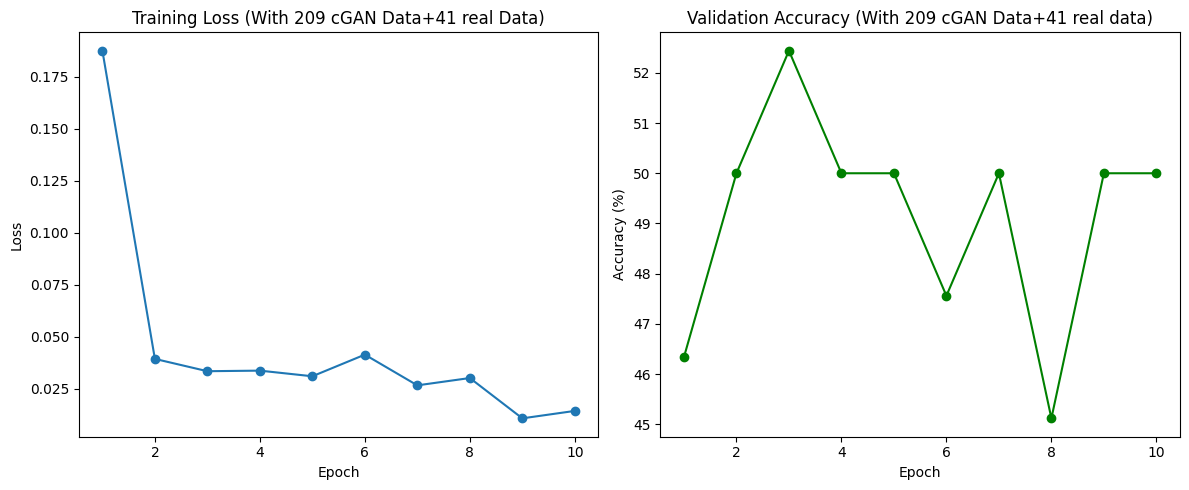

In [35]:
# Data transform for CNN
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load combined dataset
train_data_aug = datasets.ImageFolder(root='cGAN+new', transform=transform)
train_loader_aug = DataLoader(train_data_aug, batch_size=32, shuffle=True)

# Reuse the original validation set
val_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Test", transform=transform)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# CNN model from part 1
model = CowHorseCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop with augmented data
train_losses = []
val_accuracies = []
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader_aug:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_aug)
    train_losses.append(train_loss)

    # Evaluate on validation set
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"[Epoch {epoch+1}/{epochs}] - Loss: {train_loss:.4f} - Val Acc: {val_accuracy:.2f}%")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o')
plt.title(f"Training Loss (With {num_fake} cGAN Data+{num_real} real Data)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), val_accuracies, marker='o', color='green')
plt.title(f"Validation Accuracy (With {num_fake} cGAN Data+{num_real} real data)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.tight_layout()
plt.show()

## 2.ResNet18 revalidation

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Epoch 1/10] - Loss: 0.1281 - Val Accuracy: 59.76%
[Epoch 2/10] - Loss: 0.0214 - Val Accuracy: 74.39%
[Epoch 3/10] - Loss: 0.0052 - Val Accuracy: 84.15%
[Epoch 4/10] - Loss: 0.0102 - Val Accuracy: 51.22%
[Epoch 5/10] - Loss: 0.0044 - Val Accuracy: 85.37%
[Epoch 6/10] - Loss: 0.0013 - Val Accuracy: 87.80%
[Epoch 7/10] - Loss: 0.0010 - Val Accuracy: 80.49%
[Epoch 8/10] - Loss: 0.0008 - Val Accuracy: 63.41%
[Epoch 9/10] - Loss: 0.0003 - Val Accuracy: 70.73%
[Epoch 10/10] - Loss: 0.0003 - Val Accuracy: 74.39%


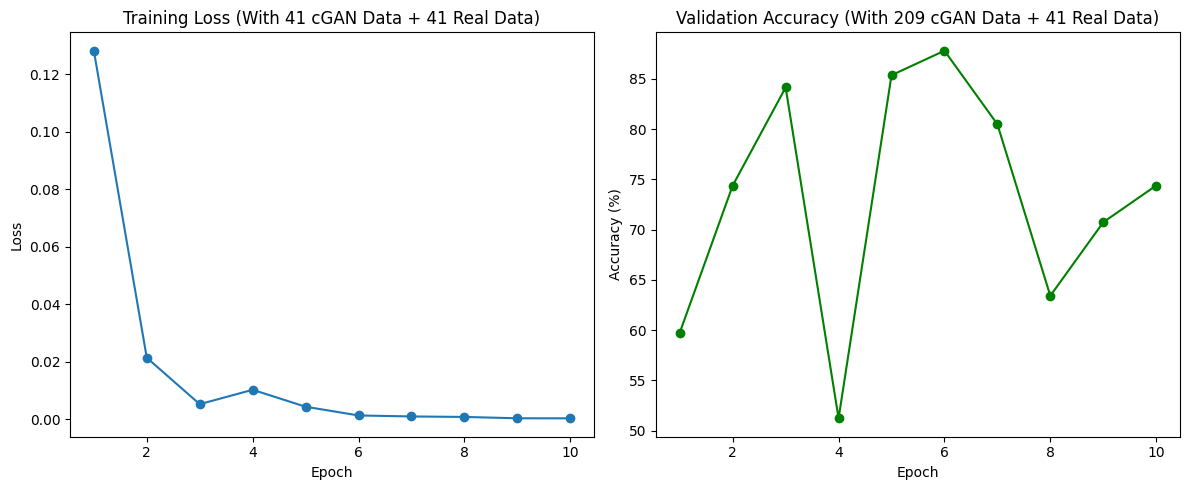

In [ ]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Load the augmented training dataset (GAN + real images)
train_data_aug = datasets.ImageFolder(root='cGAN+new', transform=transform)
train_loader_aug = DataLoader(train_data_aug, batch_size=32, shuffle=True)

# Load the validation dataset
val_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Test", transform=transform)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# Load pre-trained ResNet18 model
ResNet = models.resnet18(pretrained=True)
num_ftrs = ResNet.fc.in_features
ResNet.fc = nn.Linear(num_ftrs, 2)  # 2 classes: cow and horse
ResNet = ResNet.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ResNet.parameters(), lr=0.0001)

# Training loop
epochs = 10
train_losses = []
val_accuracies = []

for epoch in range(epochs):
    ResNet.train()
    running_loss = 0.0
    for images, labels in train_loader_aug:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = ResNet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_aug)
    train_losses.append(train_loss)

    # Validation
    ResNet.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = ResNet(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"[Epoch {epoch+1}/{epochs}] - Loss: {train_loss:.4f} - Val Accuracy: {val_accuracy:.2f}%")

# Plot training loss and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o')
plt.title("Training Loss (With 41 cGAN Data + 41 Real Data)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), val_accuracies, marker='o', color='green')
plt.title(f"Validation Accuracy (With {num_fake} cGAN Data + {num_real} Real Data)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

plt.tight_layout()
plt.show()


d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Epoch 1/10] - Loss: 0.1602 - Val Accuracy: 62.20%
[Epoch 2/10] - Loss: 0.0202 - Val Accuracy: 80.49%
[Epoch 3/10] - Loss: 0.0020 - Val Accuracy: 80.49%
[Epoch 4/10] - Loss: 0.0013 - Val Accuracy: 70.73%
[Epoch 5/10] - Loss: 0.0016 - Val Accuracy: 75.61%
[Epoch 6/10] - Loss: 0.0021 - Val Accuracy: 79.27%
[Epoch 7/10] - Loss: 0.0015 - Val Accuracy: 67.07%
[Epoch 8/10] - Loss: 0.0006 - Val Accuracy: 80.49%
[Epoch 9/10] - Loss: 0.0007 - Val Accuracy: 80.49%
[Epoch 10/10] - Loss: 0.0022 - Val Accuracy: 75.61%


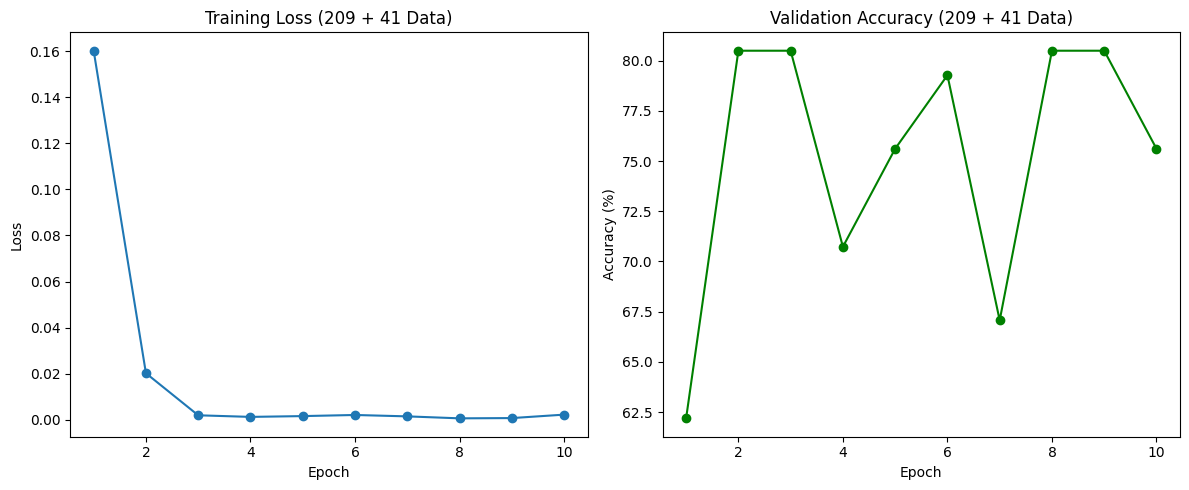

In [42]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Train data
train_data_aug = datasets.ImageFolder(root='cGAN+new', transform=transform)
train_loader_aug = DataLoader(train_data_aug, batch_size=32, shuffle=True)

# Validation set: original Test folder
val_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Test", transform=transform)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# Load pre-trained ResNet18 and rename it ResNetpre
ResNetpre = models.resnet18(pretrained=True)
num_ftrs = ResNetpre.fc.in_features
ResNetpre.fc = nn.Linear(num_ftrs, 2)
ResNetpre = ResNetpre.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ResNetpre.parameters(), lr=0.0001)

# Train loop
epochs = 10
train_losses = []
val_accuracies = []

for epoch in range(epochs):
    ResNetpre.train()
    running_loss = 0.0

    for images, labels in train_loader_aug:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = ResNetpre(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_aug)
    train_losses.append(train_loss)

    # Validation
    ResNetpre.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = ResNetpre(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"[Epoch {epoch+1}/{epochs}] - Loss: {train_loss:.4f} - Val Accuracy: {val_accuracy:.2f}%")

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker='o')
plt.title(f"Training Loss ({num_fake} + {num_real} Data)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), val_accuracies, marker='o', color='green')
plt.title(f"Validation Accuracy ({num_fake} + {num_real} Data)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

plt.tight_layout()
plt.show()


## 3.ResNet+k-NN revalidation

d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Users\MA\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


🔍 Extracting features from GAN+Real training set...
🔍 Extracting features from validation set...
🚀 Training resnetknn on augmented dataset...
✅ resnetknn Validation Accuracy (With 209 GAN + 41 Real Data): 89.02%


<Figure size 600x600 with 0 Axes>

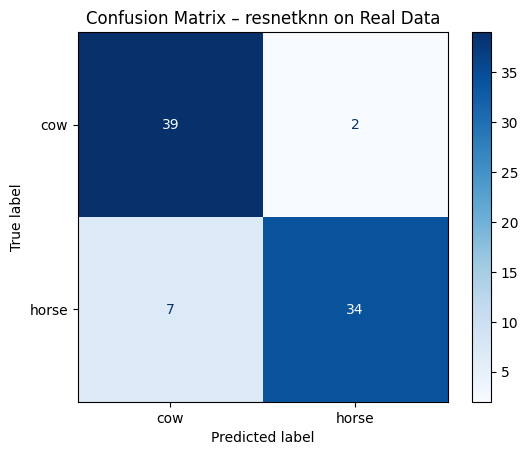

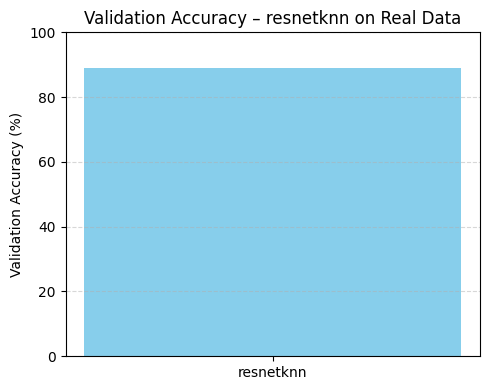

In [35]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image transform (for ResNet feature extractor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    #transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Load GAN+real training dataset
train_data_aug = datasets.ImageFolder(root='cGAN+new', transform=transform)
train_loader_aug = DataLoader(train_data_aug, batch_size=32, shuffle=False)

# Load original test set for evaluation
val_data = datasets.ImageFolder(root="C:\\Users\\MA\\Desktop\\master\\S8\\Machine vision\\Newdata\\Test", transform=transform)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# Load ResNet18 as frozen feature extractor
resnetknn_feature_extractor = models.resnet18(pretrained=True)
resnetknn_feature_extractor.fc = nn.Identity()
resnetknn_feature_extractor = resnetknn_feature_extractor.to(device)
resnetknn_feature_extractor.eval()

# Extract features
def extract_features(dataloader):
    features, labels = [], []
    with torch.no_grad():
        for images, targets in dataloader:
            images = images.to(device)
            feats = resnetknn_feature_extractor(images).cpu().numpy()
            features.append(feats)
            labels.append(targets.numpy())
    return np.vstack(features), np.hstack(labels)

print("🔍 Extracting features from GAN+Real training set...")
X_train, y_train = extract_features(train_loader_aug)

print("🔍 Extracting features from validation set...")
X_val, y_val = extract_features(val_loader)

# Train K-NN classifier
print("🚀 Training resnetknn on augmented dataset...")
resnetknn = KNeighborsClassifier(n_neighbors=10)
resnetknn.fit(X_train, y_train)

# Predict and evaluate
y_pred = resnetknn.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"✅ resnetknn Validation Accuracy (With {num_fake} GAN + {num_real} Real Data): {acc * 100:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_data_aug.classes)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix – resnetknn on Real Data")
plt.show()

# Plot accuracy bar
plt.figure(figsize=(5, 4))
plt.bar(['resnetknn'], [acc * 100], color='skyblue')
plt.ylim(0, 100)
plt.ylabel("Validation Accuracy (%)")
plt.title("Validation Accuracy – resnetknn on Real Data")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Part IV: Summery of models and files

Part I: Classifier

- CowHorseCNN(): CNN model to classify images

- ResNet(): ResNet18 model (not pretrained)to classify images

- ResNetpre(): ResNet18 model (pretrained)to classify images

- resnetknn(): ResNet pretrain then k-NN classify

Part II: GANs

- GANgenerator, GANdiscriminator: DCGAN with no labels

- cgenerator, cdiscriminator: conditional GAN using BCE loss function(normal one)

- cgenerator_wgan, cdiscriminator_wgan: conditional GAN using WGAN-GP loss function(improved the loss function)

- G: cycle GAN for horse->cow(horse but with cow color)

- F: cycle GAN for cow->horse(cow but with horse color)

- pgenerator: generator of the progressive conditional GAN

- pdiscriminator: discrimonator of the progressive conditional GAN

Part III: file name definition

- generated: common DCGAN model results

- generated_cGAN: conditional GAN results with normal BCE loss function

- generated_cGAN_wgan: conditional GAN results with WGAN-GP loss function

- generated_progressive_cGAN: conditional GAN using progressive resolution

- result_cow_to_horse: cycle GAN using model F

- result_horse_to_cow: cycle GAN using model G

- combined_dataset_cGAN: generate 500 fake cows and 500 fake horses

- cGAN+new: combine the fake images and the real images


In [87]:
import torch

print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
print("Current Device:", torch.cuda.current_device() if torch.cuda.is_available() else "N/A")

GPU Available: True
GPU Name: NVIDIA GeForce RTX 4060 Laptop GPU
Current Device: 0
